# Part 1: Scraping Spotify with SpotiPy

In [3]:
#!pip install spotipy
# https://spotipy.readthedocs.io/en/2.19.0/
# https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b

In [5]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import pickle
cid = 'a9e38e018cac4ed48862f3a17f6e4916'
secret = '3ea96c2bba71437c98b65bcdc281840f'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

## Fetching Song Information

In [6]:
#taken from https://github.com/MaxHilsdorf/introduction_to_spotipy/blob/master/introduction_to_spotipy.ipynb
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

def get_playlist_tracks(playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [7]:
#list of playlists to scrape

playlist_ids = [ '5fWeZI5FLdUkowl4qaglPi', 
                '7s17jTD83GgeKajAMogIen',  '37i9dQZF1DX186v583rmzp', '5DZ93TH6ABgWYRgdBNJs8O',
                '1v7PU8UDskwhdvjtW8m9vG' , '4wCUeeLxAgOcmZyH5m7A7J' , '2BpEFSiLIb7rsVPax4sRpj',
               '2tXWfhxQF9gOLimKxW9fvm',
                '2PBE8HLIDI4XlowI3wyqvb' # Nas's discography
               ]

In [8]:
track_lists = []
for i in playlist_ids:
    track_list = get_playlist_tracks(i)
    print(sp.playlist(i)['name'], str(len(track_list)) + ' songs')
    #print(len(track_list))
    track_lists.extend(track_list)

Hip Hop 90s 64 songs
Hip Hop 2000 127 songs
I Love My '90s Hip-Hop 100 songs
HIP HOP 2022 🔥 New Rap & Trap Hits 170 songs
biggest rap playlist ever 2571 songs
Hip Hop 595 songs
The Biggest Rap Playlist Ever Created 4219 songs
🚨 Biggest Old School Hip Hop - Boom Bap 90s 3339 songs
Nas Complete Playlist 295 songs


In [9]:
tracks_ids = []
for i in track_lists:
    try:
        tracks_ids.append(i['track']['id'])
    except:
        continue   

tracks_ids = list(set(tracks_ids))

In [10]:
len(tracks_ids)

10581

In [11]:
def get_complete_track_info(track_id):
    
    # basic info
    r = sp.track(track_id)
    album_id = r['album']['id']
    artist_id = [i['id'] for i in r['artists']]
    duration_ms = r['duration_ms']
    explicit = r['explicit']
    url = r['href'] 
    song_id = r['id']
    song_name = r['name']
    song_popularity = r['popularity']
    song_type = r['type']
    song_release_date = r['album']['release_date']
    
    
    # track audio analysis attributes
    af = sp.audio_features([track_id])[0]
    track_danceability = af['danceability']
    track_energy = af['energy']
    track_key = af['key']
    track_loudness = af['loudness']
    track_mode = af['mode']
    track_speechiness = af['speechiness']
    track_acousticeess = af['acousticness']
    track_instrumentalness = af['instrumentalness']
    track_liveness = af['liveness']
    track_valence = af['valence']
    track_tempo = af['tempo']
    
    output = {
        'track_id' : track_id,
        'album_id' : album_id,
        'artist_id' : artist_id,
        'duration_ms' : duration_ms,
        'flg_explicit' : explicit,
        'url' : url,
        'track_name' : song_name,
        'track_popularity' : song_popularity,
        'track_type' : song_type,
        'track_danceability' : track_danceability,
        'track_energy' : track_energy,
        'track_key' : track_key,
        'track_loudness' : track_loudness,
        'track_mode' : track_mode,
        'track_speechiness' : track_speechiness,
        'track_acousticeess' : track_acousticeess,
        'track_instrumentalness' : track_instrumentalness,
        'track_liveness' : track_liveness,
        'track_valence' : track_valence,
        'track_tempo' : track_tempo   , 
        'track_release_date' : song_release_date
    }
    
    return output


In [14]:
partition_size = int(len(tracks_ids)/4)
p1 = 0 + partition_size*1
p2 = 0 + partition_size*2
p3 = 0 + partition_size*3
#p4 = print(0 + partition_size*4)
print(p1,p2,p3)

2645 5290 7935


In [15]:
track_info = []
f = 0 
for i in tracks_ids[:p1]:
    try:
        track_info.append(get_complete_track_info(i))
    except:
        continue   
        
    f += 1
    if f in [500,1000,1500]:
        print(f)

    

500
1000
1500


In [16]:
df_tracks1 = pd.DataFrame(track_info)
df_tracks1.to_csv('df_tracks1.csv')

In [17]:
track_info = []
f=0

for i in tracks_ids[p1:p2]:
    try:
        track_info.append(get_complete_track_info(i))
    except:
        continue  
    
    f += 1
    if f in [500,1000,1500,2000]:
        print(f)


    

500
1000
1500
2000


In [18]:
df_tracks2 = pd.DataFrame(track_info)
df_tracks2.to_csv('df_tracks2.csv')

In [19]:
track_info = []
f = 0

for i in tracks_ids[p2:p3]:
    try:
        track_info.append(get_complete_track_info(i))
    except:
        continue   
    f += 1
    if f in [500,1000,1500,2000]:
        print(f)

    

500
1000
1500
2000


In [20]:
df_tracks3 = pd.DataFrame(track_info)
df_tracks3.to_csv('df_tracks3.csv')

In [21]:
track_info = []
f = 0
for i in tracks_ids[p3:]:
    try:
        track_info.append(get_complete_track_info(i))
    except:
        continue   
    f += 1
    if f in [500,1000,1500,2000]:
        print(f)

500
1000
1500
2000


In [22]:
df_tracks4 = pd.DataFrame(track_info)
df_tracks4.to_csv('df_tracks4.csv')

In [23]:
df_alltracks = pd.concat([df_tracks1,df_tracks2,df_tracks3,df_tracks4] )  

In [25]:
# Save intermediate table as backup

import pickle
with open('df_alltracks.pickle', 'wb') as handle:
    pickle.dump(df_alltracks, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Fetching Artists Information

In [10]:
df_alltracks.artist_id = df_alltracks.artist_id.apply(lambda x: x[0])
df_tracks = df_alltracks.copy()
artist_ids  = df_tracks.artist_id.drop_duplicates()
artist_ids = list(set(artist_ids))

In [28]:
def get_complete_artist_info(artist_id):
    
    # basic info
    a = sp.artist(artist_id)
    artist_followers =  a['followers']['total']
    artist_genres = a['genres']
    artist_name = a['name']
    artist_popularity = a['popularity']
    artist_url = a['href']
    
    
    output = {
        'artist_id' : artist_id,
        'artist_followers' : artist_followers,
        'artist_genres' : artist_genres,
        'artist_name' : artist_name,
        'artist_popularity' : artist_popularity,
        'artist_url' : artist_url
    }
    
    return output

In [29]:
artist_info = []
for i in artist_ids:
    artist_info.append(get_complete_artist_info(i))

In [30]:
df_artist = pd.DataFrame(artist_info)

In [31]:
df_artist = df_artist[['artist_id', 'artist_name',   'artist_genres' , 'artist_followers', 'artist_popularity']]

In [32]:
df_artist.to_csv('artists.csv',index=False)

# Part 2: Adding song lyrics to the scraped songs with Genius API

In [34]:
#!pip install lyricsgenius
# https://pypi.org/project/lyricsgenius/
import lyricsgenius 

In [35]:
token = 'VNjZ4TlG0wseZD6EEJtldfsRggS9haHsS0HvRgQOrhInbtzeZj3PaWldXdC162RB'
genius = lyricsgenius.Genius(token)

In [36]:
genius.verbose = False # Turn off status messages
genius.remove_section_headers = True 

In [37]:
with open('df_alltracks.pickle', 'rb') as handle:
    df_alltracks = pickle.load(handle)

artists = pd.read_csv('artists.csv')

In [39]:
df_alltracks['track_release_year'] = pd.to_datetime(df_alltracks.track_release_date).dt.year
#value_counts().plot(kind='barh')

In [40]:
df_alltracks['track_release_decade'] = (df_alltracks.track_release_year.astype(str).str.slice(2,3)+'0')

In [41]:
df_alltracks.artist_id = df_alltracks.artist_id.apply(lambda x: x[0])
print(df_alltracks.shape)
df_alltracks = df_alltracks.merge(artists ,  how='left', left_on = 'artist_id', right_on = 'artist_id')


(10580, 23)


**Extract in batches of 4K due to long duration of the task**

In [54]:
lyrics_ls = []

f = 0
for song, artist_ in zip(df_alltracks.track_name[:] ,  df_alltracks.artist_name[:]):
    try:
        lyrics_ls.append(genius.search_song(title = song, artist = artist_ ).lyrics )
    except:
        lyrics_ls.append('')
        
    f += 1    
    if f in [333*i for i in range(1,15)]:
        print(f)
    if f == 4000:
        break
        
df_4k = df_alltracks[:4000].copy()
df_4k['lyrics'] = lyrics_ls
df_4k.to_csv('tracks4k.csv', index=None)

333
666
999
1332
1665
1998
2331
2664
2997
3330
3663
3996


In [63]:
lyrics_ls_2 = []

f = 0
for song, artist_ in zip(df_alltracks.track_name[4000:8000] ,  df_alltracks.artist_name[4000:8000]):
    try:
        lyrics_ls.append(genius.search_song(title = song, artist = artist_ ).lyrics )
    except:
        lyrics_ls.append('')
        
    f += 1    
    if f in [333*i for i in range(1,15)]:
        print(f)
        
df_4k = df_alltracks[4000:8000].copy()
df_4k['lyrics'] = lyrics_ls[4000:8000]

df_4k.to_csv('tracks4_8k.csv', index=None)

333
666
999
1332
1665
1998
2331
2664
2997
3330
3663
3996


In [64]:
df1 = pd.read_csv('tracks4k.csv')
df2 = pd.read_csv('tracks4_8k.csv')
df_all = pd.concat([df1,df2])#,df3,df4, df5 
df_all = df_all[ ~ df_all.lyrics.isna() ]

In [74]:
df_all.shape

(7213, 28)

In [75]:
df_all.to_csv('7k_songs_and_lyrics.csv', index=None)
df_all.shape

(7213, 28)

# Part 3: Lyrics Cleaning and Preprocessing

In [44]:
import nltk
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.corpus import stopwords
import re
import numpy as np

stopwords = stopwords.words('english') 

#nltk.download('words')
#nltk.download('wordnet')
from nltk.corpus import words
from nltk.corpus import wordnet 


In [50]:
def preprocess(sentence):
    
    '''Multi-step text preprocessing includes: lower-casing, remove symbols, links, numbers,
    tokenizing, stopwords removal '''
    
    sentence=str(sentence)
    sentence = sentence.lower()

    # Clean text
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    
    # Remove numbers
    rem_num = re.sub('[0-9]+', '', cleantext)
    
    # Tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords] #stopwords
    return " ".join(filtered_words)


words = set(nltk.corpus.words.words())
wordnet = set(nltk.corpus.wordnet.words())
manywords = set.union(wordnet , words)

def remove_foreign(t):
    '''Remove non-English words'''
    
    return " ".join(w for w in nltk.wordpunct_tokenize(t) if w.lower() in manywords or not w.isalpha())

In [31]:
df = pd.read_csv('7k_songs_and_lyrics.csv')

In [32]:
df['lyrics_clean'] = df.lyrics.map(lambda s:preprocess(s)) 
df['lyrics_clean'] = df.lyrics_clean.apply(remove_foreign)
df['lyrics_clean_split'] = df["lyrics_clean"].str.split()

In [51]:
stemmer = SnowballStemmer('english')
df['lyrics_clean_stemmed'] = df.lyrics_clean_split.apply(lambda x: [stemmer.stem(i) for i in x])

In [48]:
df['lyrics_wordlen'] = df.lyrics_clean_split.apply(lambda x: len(x))

0    [detroit, flow, fuck, hold, really, like, soun...
1    [pet, sound, yes, turbid, like, reclaim, freel...
2    [substance, woke, yeah, yeah, yeah, yeah, beat...
3    [look, many, shit, many, young, metro, trust, ...
4    [hardcore, rap, act, hook, hardcore, rap, act,...
5    [shine, doubt, doubt, doubt, sewer, area, feel...
6    [old, school, underground, rap, early, scene, ...
7    [barely, hit, ways, stop, get, deserve, call, ...
8    [yachty, yachty, joe, feat, ray, yachty, bank,...
9    [swim, yeah, yeah, yeah, ooh, hah, woke, yes, ...
Name: lyrics_clean_split, dtype: object

In [52]:
# remove songs that have very low or very high lyrics_length
q3 =np.percentile(df.lyrics_wordlen, q = 3)
q97 = np.percentile(df.lyrics_wordlen, q = 97)
df = df[df.lyrics_wordlen.between(q3,q97)].iloc[:]
df = df.reset_index(drop=True)

In [53]:
# remove songs that could be versions of existing ones, because their lyrics tend to be incorrect
df = df[ ~ df.track_name.astype(str).str.contains('Remaster')]
df = df[ ~ df.track_name.astype(str).str.contains('Version')].reset_index(drop=True)
df = df[ ~ df.track_name.astype(str).str.contains('Live')].reset_index(drop=True)

In [54]:
df.artist_genres = df.artist_genres.str.replace('[', '', regex=False)
df.artist_genres = df.artist_genres.str.replace(']', '', regex=False)
df.artist_genres = df.artist_genres.str.replace('\'', '', regex=False)
df.artist_genres = df.artist_genres.str.replace('[', '', regex=False)
df.artist_genres = df.artist_genres.str.split(',').apply(lambda x: [e.strip() for e in x]).tolist()

In [55]:
df.track_release_date = pd.to_datetime(df.track_release_date)
df['track_release_year'] = df.track_release_date.dt.year
df['track_release_decade'] = df.track_release_year.astype(str).str.slice(2,3)+'0'


<AxesSubplot:title={'center':'Decade Distribution'}>

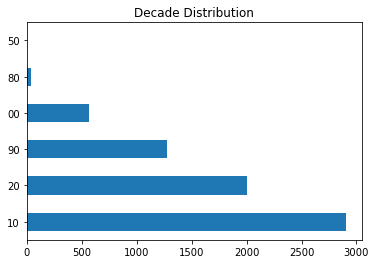

In [56]:
df['track_release_decade'].value_counts().head(10).plot(kind='barh', title='Decade Distribution')

<AxesSubplot:title={'center':'Popular Artists'}>

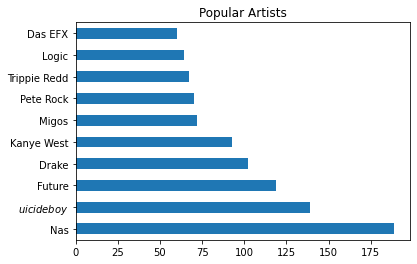

In [57]:
df.artist_name.value_counts().head(10).plot(kind='barh', title = 'Popular Artists')

In [58]:
import pickle


with open('df_rap_7k.pickle', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)